# CRISP DM ON HOUSING DATASET
## 

### Phase 1: Business Understanding

__OBJECTIVE:__ 
- To predict MO (Number of minors per residence).
- This can help planners identify neighborhoods which attract families with children.
- It also helps to predict the demand for child related services like schools and play areas. 

### Phase 2: Data Understanding

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Load the data from the Excel file
df = pd.read_excel("HousingData.xlsx", sheet_name="HousingData")
df.head()

,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
0,101,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,2.0,296.0
1,102,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,2.0,242.0
2,103,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,292.40,4.03,3.0,242.0
3,104,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,0.0,222.0
4,105,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,0.0,222.0


In [3]:
# Describe the data
print("Data Description:")
df.describe()

Data Description:


,PID,CRIM,AC,INDUS,LS,PR,RM,AGE,DIS,RAD,PTRATIO,DMT,LSTAT,MO,TAX
count,506.000000,504.000000,506.000000,506.000000,504.000000,503.000000,502.000000,502.00000,503.000000,504.000000,503.000000,502.000000,505.000000,504.000000,505.000000
mean,353.500000,3.604056,11.363636,11.136779,0.069444,0.554164,6.285307,68.53008,3.796207,9.492063,18.443539,305.414530,12.654099,0.644841,407.726733
std,146.213884,8.609134,23.322453,6.860353,0.254461,0.115830,0.704098,28.13882,2.103234,8.676649,2.165602,142.836519,7.148104,1.794307,168.312294
min,101.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.90000,1.129600,1.000000,12.600000,0.320000,1.730000,0.000000,187.000000
25%,227.250000,0.082155,0.000000,5.190000,0.000000,0.449000,5.885500,45.02500,2.100350,4.000000,17.350000,293.572500,6.930000,0.000000,279.000000
50%,353.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.50000,3.215700,5.000000,19.000000,386.910000,11.340000,0.000000,330.000000
75%,479.750000,3.674808,12.500000,18.100000,0.000000,0.624000,6.623500,93.97500,5.164950,24.000000,20.200000,394.997500,16.960000,0.000000,666.000000
max,606.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,22.000000,396.900000,37.970000,19.000000,711.000000


In [4]:
# Column names
print("Column Names:")
df.columns 

Column Names:


Index(['PID', 'CRIM', 'AC', 'INDUS', 'LS', 'PR', 'RM', 'AGE', 'DIS', 'RAD',
       'PTRATIO', 'DMT', 'LSTAT', 'MO', 'TAX'],
      dtype='object')

In [5]:
# Data info
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PID      506 non-null    int64  
 1   CRIM     504 non-null    float64
 2   AC       506 non-null    float64
 3   INDUS    506 non-null    float64
 4   LS       504 non-null    float64
 5   PR       503 non-null    float64
 6   RM       502 non-null    float64
 7   AGE      502 non-null    float64
 8   DIS      503 non-null    float64
 9   RAD      504 non-null    float64
 10  PTRATIO  503 non-null    float64
 11  DMT      502 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MO       504 non-null    float64
 14  TAX      505 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


All columns have the float datatype, except PID having int.

In [6]:
# Explore data: Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
PID        0
CRIM       2
AC         0
INDUS      0
LS         2
PR         3
RM         4
AGE        4
DIS        3
RAD        2
PTRATIO    3
DMT        4
LSTAT      1
MO         2
TAX        1
dtype: int64


Some columns have missing values ranging between 1 to 4. 

In [7]:
# Shape of the dataset
df.shape

(506, 15)

The dataset has 15 columns and 506 rows. 

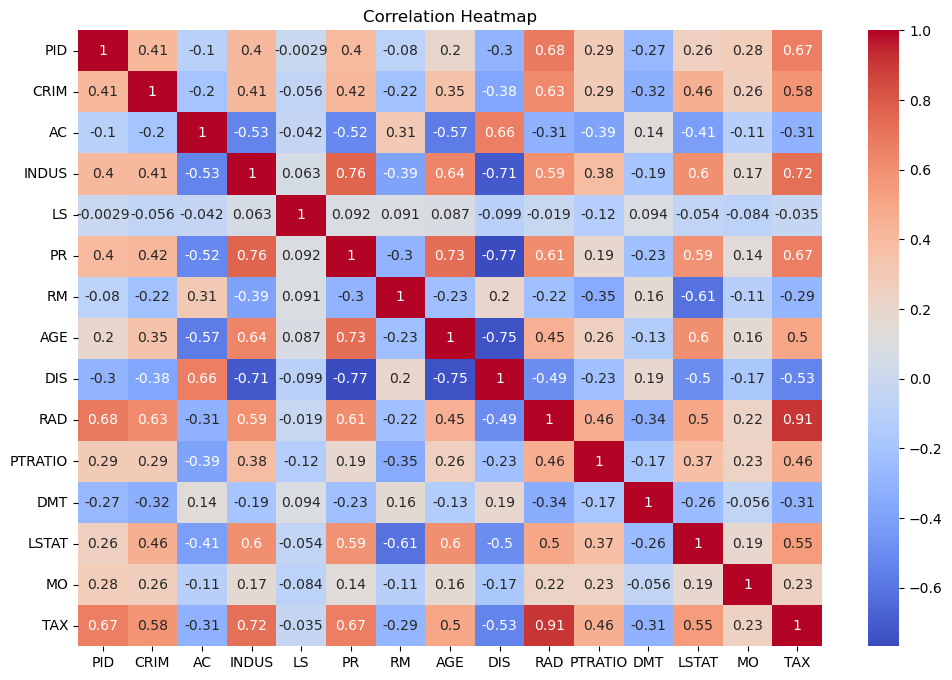

In [8]:
# Visualize correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

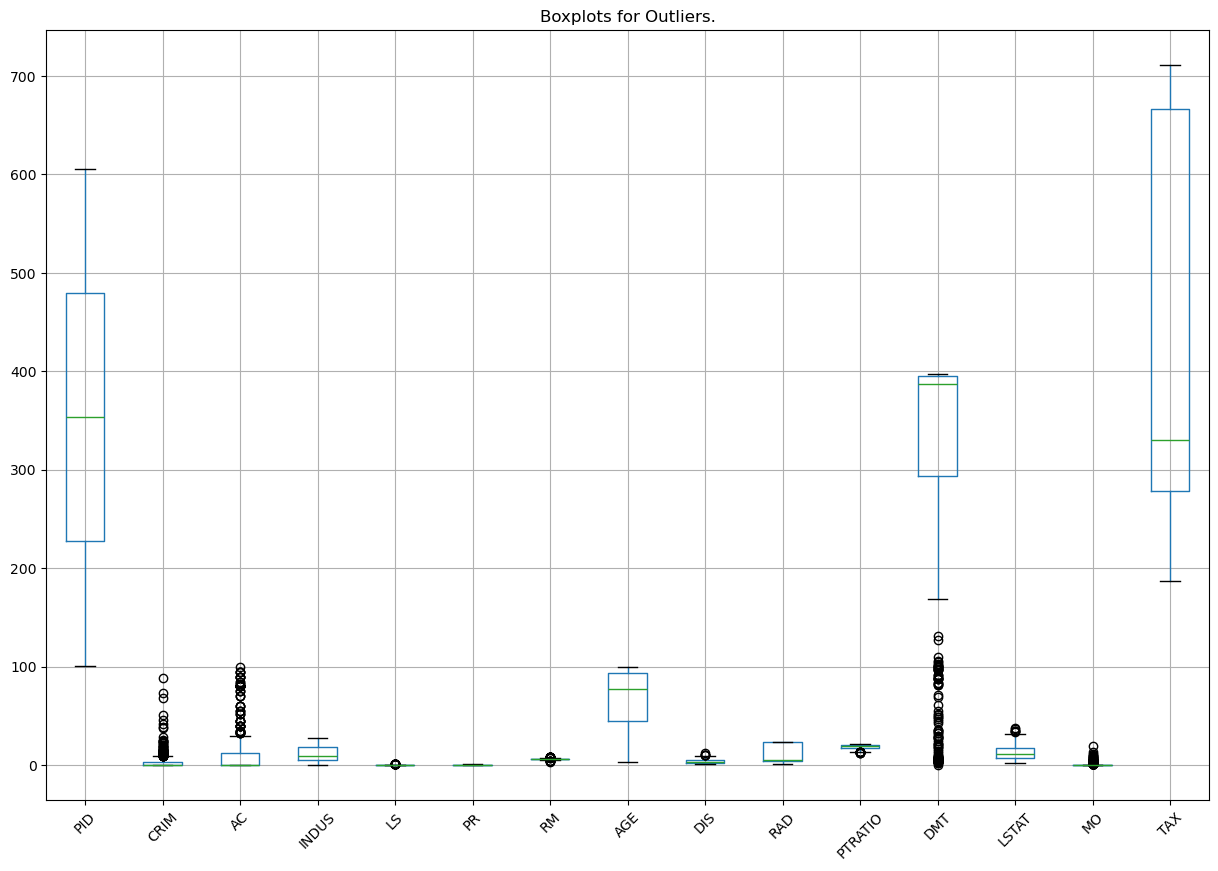

In [9]:
num_cols = df.select_dtypes(include=['float64','int64']).columns

plt.figure(figsize=(15,10))
df[num_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots for Outliers.")
plt.show()

In [10]:
# Checking for duplicates 
df.duplicated().sum()

0

The dataset has no duplicate entries. 

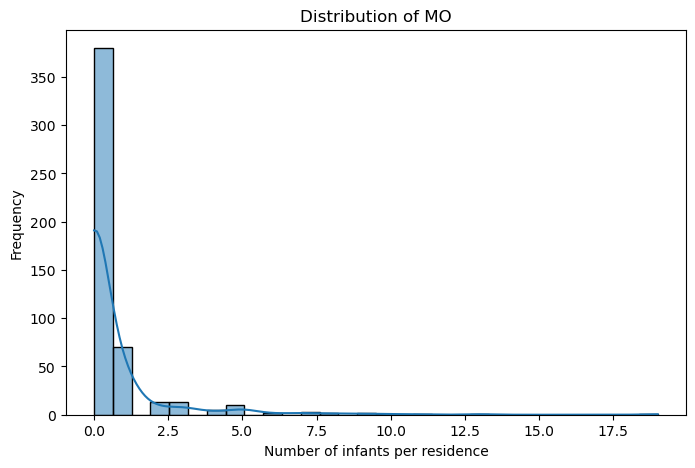

In [11]:
# Checking if the data is normalised
plt.figure(figsize=(8,5))
sns.histplot(df['MO'], bins=30, kde=True)
plt.title("Distribution of MO")
plt.xlabel("Number of infants per residence")
plt.ylabel("Frequency")
plt.show()

The data for MO is skewed to the right. 

In [12]:
# Check skewness
skewness = df.skew().sort_values(ascending=False)
print("Skewness of columns:\n", skewness)

Skewness of columns:
 CRIM       5.231785
MO         4.891492
LS         3.397542
AC         2.225666
RAD        1.021006
DIS        1.016357
LSTAT      0.905148
PR         0.738762
TAX        0.675963
RM         0.402240
INDUS      0.295022
PID        0.000000
AGE       -0.600112
PTRATIO   -0.795056
DMT       -1.303393
dtype: float64


### Phase 3: Data Preparation

In [13]:
# Dropping the identifier as it is not important
df = df.drop(columns=["PID"])

In [14]:
# Dropping rows with missing values
df = df.dropna()

This is because the number of missing values is very small. 

In [15]:
# Apply log1p transformation to skewed columns (threshold = abs(skew) > 0.5)
skewed_cols = skewness[abs(skewness) > 0.5].index
df = df.copy()
df[skewed_cols] = np.log1p(df[skewed_cols])

In [16]:
# Outlier capping 
# Columns identified with outliers
cols_to_clip = ["CRIM", "AC", "AGE", "DIS", "RAD", "PTRATIO", "DMT", "LSTAT", "MO"]

# Clip values to 1st and 99th percentile based on training set
df = df.copy()

for col in cols_to_clip:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(q1, q99)

In [17]:
X = df[["CRIM", "RAD", "PTRATIO", "TAX"]]
y = df["MO"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Phase 4 & 5: Modeling and Evaluation

#### Poisson Regression

In [18]:
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [19]:
def poisson_regression_model(X_train, X_test, y_train, y_test):
    """
    Perform Poisson regression modeling for MO prediction
    """
    
    # Select only the specified features
    features = ['CRIM', 'RAD', 'PTRATIO', 'TAX']
    
    # Ensure we have the correct features
    X_train = X_train[features]
    X_test = X_test[features]
    
    print("=== Dataset Summary ===")
    print(f"Training set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    print(f"Features used: {list(X_train.columns)}")
    
    # Scale features for better convergence
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrame for better interpretation
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
    
    # Poisson Regression Model
    print("\n=== Training Poisson Regression ===")
    
    # Initialize and train the model
    poisson_model = PoissonRegressor(alpha=0.1, max_iter=1000)
    poisson_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred_train = poisson_model.predict(X_train_scaled)
    y_pred_test = poisson_model.predict(X_test_scaled)
    
    # Convert predictions to integers (count data)
    y_pred_train = np.round(np.maximum(y_pred_train, 0)).astype(int)
    y_pred_test = np.round(np.maximum(y_pred_test, 0)).astype(int)
    
    return poisson_model, scaler, y_pred_train, y_pred_test, X_train_scaled, X_test_scaled

In [20]:
def evaluate_model(y_true, y_pred, dataset_name):
    """
    Comprehensive evaluation of the model
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # Calculate Poisson deviance
    # Handle zero predictions to avoid log(0)
    y_pred_safe = np.where(y_pred == 0, 0.001, y_pred)
    poisson_deviance = 2 * np.sum(y_true * np.log(y_true / y_pred_safe) - (y_true - y_pred))
    
    # Calculate R-squared (proportion of variance explained)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0
    
    print(f"\n{dataset_name} Results:")
    print(f"Mean Absolute Error (MAE): {mae:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R² Score: {r_squared:.3f}")
    print(f"Poisson Deviance: {poisson_deviance:.3f}")
    print(f"Mean of Actual: {y_true.mean():.3f}")
    print(f"Mean of Predicted: {y_pred.mean():.3f}")
    print(f"Standard Deviation of Actual: {y_true.std():.3f}")
    print(f"Standard Deviation of Predicted: {y_pred.std():.3f}")
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'R2': r_squared,
        'Poisson_Deviance': poisson_deviance,
        'Mean_Actual': y_true.mean(),
        'Mean_Predicted': y_pred.mean()
    }


In [21]:
def plot_results(y_train, y_pred_train, y_test, y_pred_test, model, feature_names):
    """
    Create diagnostic plots
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Training set plots
    # Actual vs Predicted
    axes[0, 0].scatter(y_train, y_pred_train, alpha=0.6, color='blue')
    axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'red', linestyle='--')
    axes[0, 0].set_xlabel('Actual MO')
    axes[0, 0].set_ylabel('Predicted MO')
    axes[0, 0].set_title('Training: Actual vs Predicted')
    
    # Residuals
    residuals_train = y_train - y_pred_train
    axes[0, 1].scatter(y_pred_train, residuals_train, alpha=0.6, color='blue')
    axes[0, 1].axhline(y=0, color='red', linestyle='--')
    axes[0, 1].set_xlabel('Predicted MO')
    axes[0, 1].set_ylabel('Residuals')
    axes[0, 1].set_title('Training: Residuals vs Predicted')
    
    # Distribution comparison
    axes[0, 2].hist(y_train, alpha=0.7, label='Actual', bins=15, color='blue')
    axes[0, 2].hist(y_pred_train, alpha=0.7, label='Predicted', bins=15, color='orange')
    axes[0, 2].set_xlabel('MO')
    axes[0, 2].set_ylabel('Frequency')
    axes[0, 2].set_title('Training: Distribution Comparison')
    axes[0, 2].legend()
    
    # Test set plots
    # Actual vs Predicted
    axes[1, 0].scatter(y_test, y_pred_test, alpha=0.6, color='green')
    axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', linestyle='--')
    axes[1, 0].set_xlabel('Actual MO')
    axes[1, 0].set_ylabel('Predicted MO')
    axes[1, 0].set_title('Test: Actual vs Predicted')
    
    # Residuals
    residuals_test = y_test - y_pred_test
    axes[1, 1].scatter(y_pred_test, residuals_test, alpha=0.6, color='green')
    axes[1, 1].axhline(y=0, color='red', linestyle='--')
    axes[1, 1].set_xlabel('Predicted MO')
    axes[1, 1].set_ylabel('Residuals')
    axes[1, 1].set_title('Test: Residuals vs Predicted')
    
    # Distribution comparison
    axes[1, 2].hist(y_test, alpha=0.7, label='Actual', bins=15, color='green')
    axes[1, 2].hist(y_pred_test, alpha=0.7, label='Predicted', bins=15, color='orange')
    axes[1, 2].set_xlabel('MO')
    axes[1, 2].set_ylabel('Frequency')
    axes[1, 2].set_title('Test: Distribution Comparison')
    axes[1, 2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance plot
    coefficients = model.coef_
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Absolute_Effect': np.abs(coefficients)
    }).sort_values('Absolute_Effect', ascending=False)
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
    plt.xlabel('Coefficient Value')
    plt.title('Poisson Regression Coefficients')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.3f}', ha='left', va='center')
    
    plt.tight_layout()
    plt.show()
    
    return feature_importance

In [22]:
def interpret_model(model, feature_names, scaler):
    """
    Interpret the Poisson model coefficients
    """
    coefficients = model.coef_
    intercept = model.intercept_
    
    print("\n=== MODEL INTERPRETATION ===")
    print(f"Intercept: {intercept:.4f}")
    print("\nCoefficients (log-scale):")
    for i, feature in enumerate(feature_names):
        print(f"  {feature}: {coefficients[i]:.4f}")
    
    print("\n=== INCIDENCE RATE RATIOS (IRR) ===")
    print("Interpretation: IRR > 1 increases MO, IRR < 1 decreases MO")
    for i, feature in enumerate(feature_names):
        irr = np.exp(coefficients[i])
        effect = (irr - 1) * 100
        direction = "increases" if effect > 0 else "decreases"
        print(f"  {feature}: {irr:.4f} (A one-standard-deviation {direction} MO by {abs(effect):.2f}%)")
    
    return coefficients

=== Dataset Summary ===
Training set: (389, 4)
Test set: (98, 4)
Features used: ['CRIM', 'RAD', 'PTRATIO', 'TAX']

=== Training Poisson Regression ===

MODEL EVALUATION

TRAINING SET Results:
Mean Absolute Error (MAE): 0.254
Root Mean Squared Error (RMSE): 0.543
R² Score: -0.085
Poisson Deviance: 710.514
Mean of Actual: 0.253
Mean of Predicted: 0.172
Standard Deviation of Actual: 0.522
Standard Deviation of Predicted: 0.378

TEST SET Results:
Mean Absolute Error (MAE): 0.242
Root Mean Squared Error (RMSE): 0.517
R² Score: 0.006
Poisson Deviance: 172.559
Mean of Actual: 0.283
Mean of Predicted: 0.204
Standard Deviation of Actual: 0.521
Standard Deviation of Predicted: 0.403


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


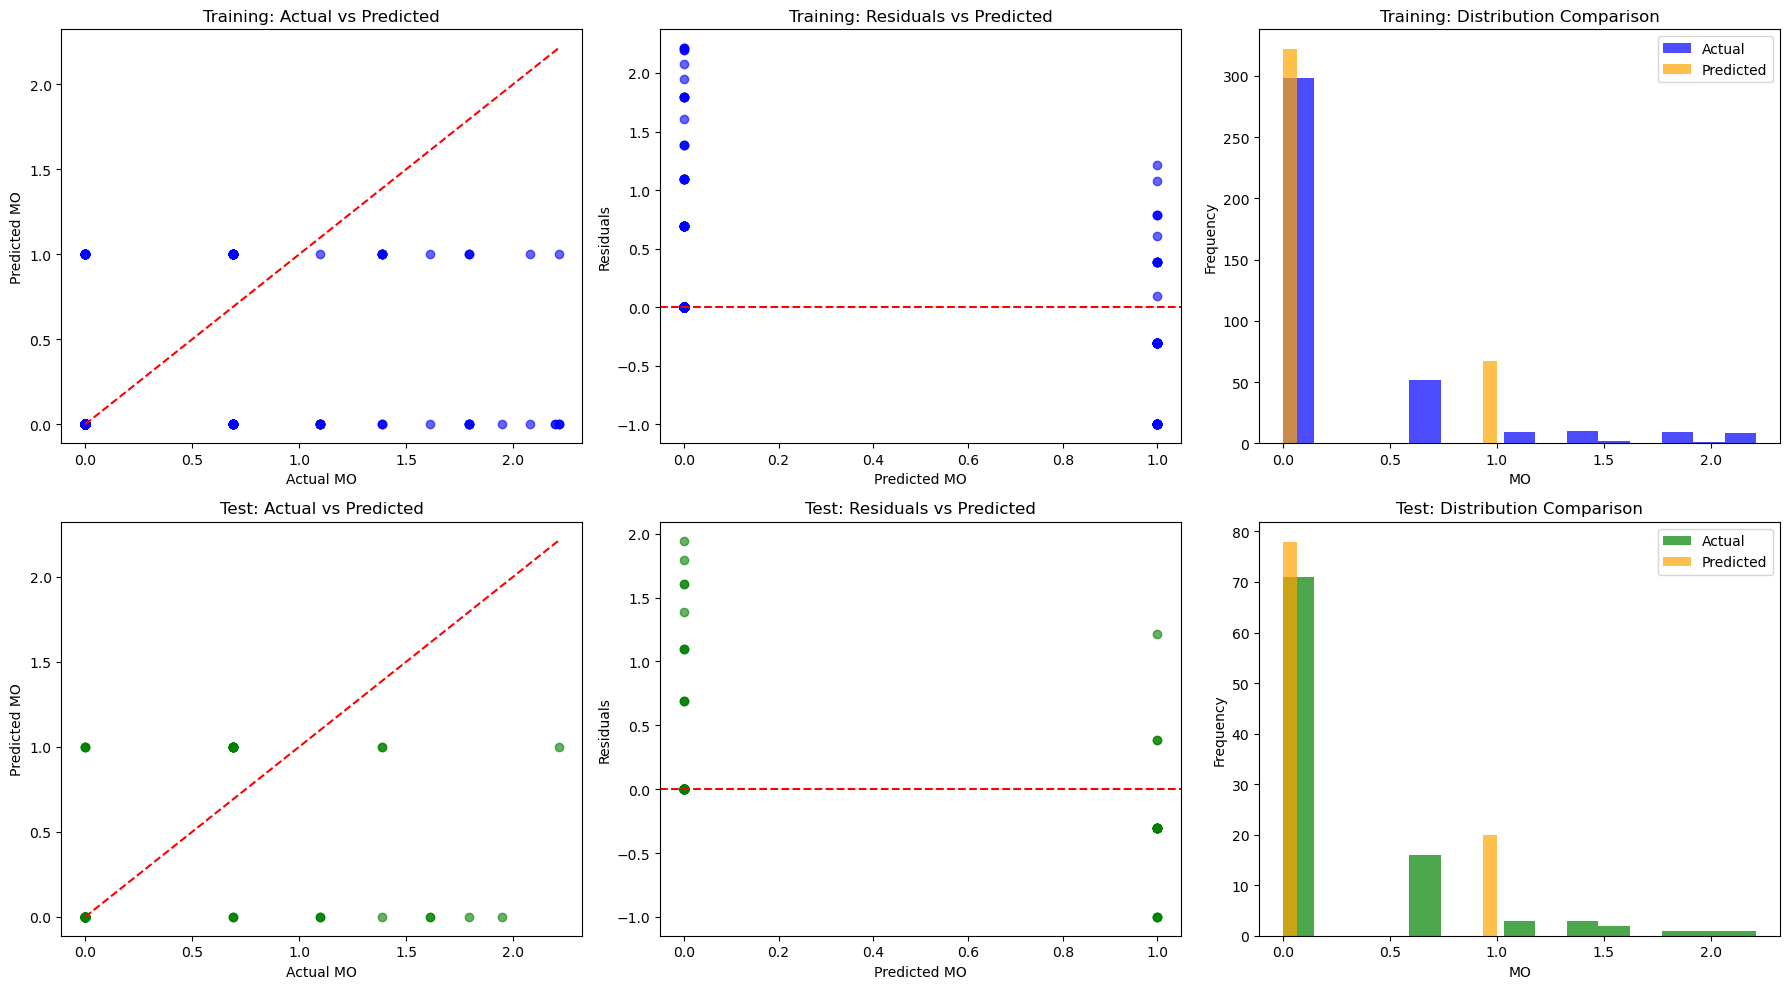

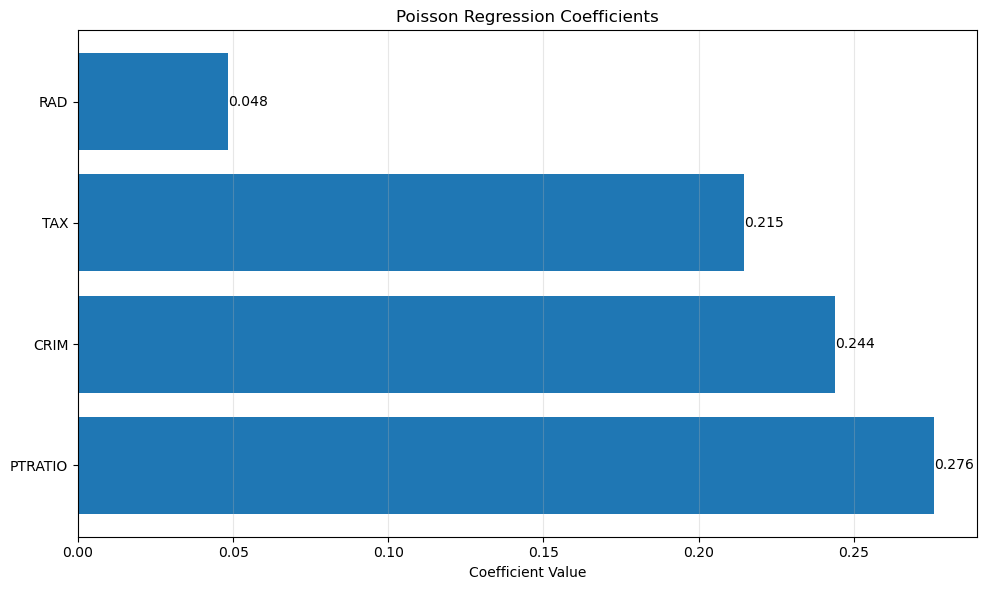


=== MODEL INTERPRETATION ===
Intercept: -1.5997

Coefficients (log-scale):
  CRIM: 0.2440
  RAD: 0.0485
  PTRATIO: 0.2759
  TAX: 0.2145

=== INCIDENCE RATE RATIOS (IRR) ===
Interpretation: IRR > 1 increases MO, IRR < 1 decreases MO
  CRIM: 1.2763 (A one-standard-deviation increases MO by 27.63%)
  RAD: 1.0497 (A one-standard-deviation increases MO by 4.97%)
  PTRATIO: 1.3177 (A one-standard-deviation increases MO by 31.77%)
  TAX: 1.2393 (A one-standard-deviation increases MO by 23.93%)

=== FEATURE IMPORTANCE (by absolute coefficient) ===
   Feature  Coefficient  Absolute_Effect
2  PTRATIO     0.275902         0.275902
0     CRIM     0.243994         0.243994
3      TAX     0.214537         0.214537
1      RAD     0.048477         0.048477

=== EXAMPLE PREDICTIONS ===
Example 1: CRIM=0.1, RAD=5, PTRATIO=15, TAX=300
  Predicted MO: 468734323214770792867814903335944931339781219493849405208054518533161985440219136 minors per residence

Example 2: CRIM=5.0, RAD=1, PTRATIO=22, TAX=600
  P

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PoissonRegressor was fitted with feature names
  warnings.warn(


In [23]:
# Main execution
if __name__ == "__main__":

    
    # Train the model
    model, scaler, y_pred_train, y_pred_test, X_train_scaled, X_test_scaled = poisson_regression_model(
        X_train, X_test, y_train, y_test
    )
    
    # Evaluate the model
    print("\n" + "="*50)
    print("MODEL EVALUATION")
    print("="*50)
    
    train_metrics = evaluate_model(y_train, y_pred_train, "TRAINING SET")
    test_metrics = evaluate_model(y_test, y_pred_test, "TEST SET")
    
    # Plot results
    feature_names = X_train.columns.tolist()
    feature_importance = plot_results(y_train, y_pred_train, y_test, y_pred_test, model, feature_names)
    
    # Model interpretation
    coefficients = interpret_model(model, feature_names, scaler)
    
    # Print feature importance
    print("\n=== FEATURE IMPORTANCE (by absolute coefficient) ===")
    print(feature_importance[['Feature', 'Coefficient', 'Absolute_Effect']])
    
    # Example prediction function
    def predict_mo(crim, rad, ptratio, tax):
        """Predict MO for new data points"""
        input_data = np.array([[crim, rad, ptratio, tax]])
        input_df = pd.DataFrame(input_data, columns=feature_names)
        
        # Scale the input
        input_scaled = scaler.transform(input_df)
        
        # Predict
        prediction = model.predict(input_scaled)[0]
        prediction = max(0, round(prediction))
        
        return prediction
    
    # Example predictions
    print("\n=== EXAMPLE PREDICTIONS ===")
    examples = [
        (0.1, 5, 15, 300),   # Low crime, medium accessibility, good schools, medium tax
        (5.0, 1, 22, 600),   # High crime, low accessibility, poor schools, high tax
        (0.05, 8, 18, 250)   # Very low crime, high accessibility, average schools, low tax
    ]
    
    for i, (crim, rad, ptratio, tax) in enumerate(examples, 1):
        pred = predict_mo(crim, rad, ptratio, tax)
        print(f"Example {i}: CRIM={crim}, RAD={rad}, PTRATIO={ptratio}, TAX={tax}")
        print(f"  Predicted MO: {pred} minors per residence")
        print()